In [ ]:
import tensorflow as tf
print(tf.__version__)

# 2.18.0

from google.colab import files
uploaded = files.upload()

2.18.0


Saving moore.csv to moore.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('moore.csv', header=None).values

In [ ]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

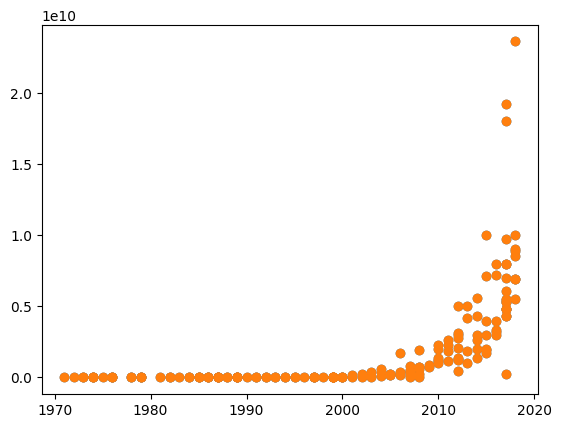

In [ ]:

plt.scatter(data[:,0], data[:,1])

X = data[:,0]
Y = data[:,1]
plt.scatter(X, Y)

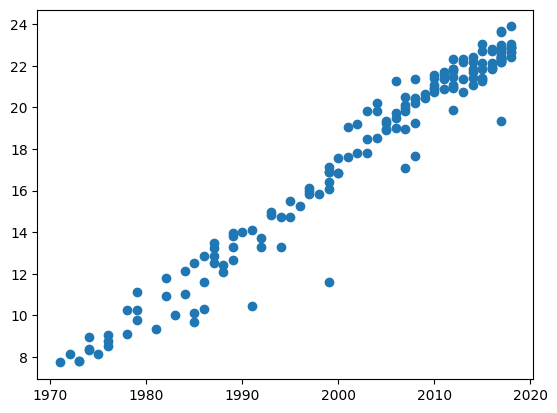

In [ ]:
Y = np.log(Y)
plt.scatter(X, Y)
# 한 번만 더 하면 로그 함수가 나옴

In [ ]:
# keras : 텐서플로우를 엔진으로 하는 딥러닝 신경망 API
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)), # 연도 입력 (1개의 숫자)
    tf.keras.layers.Dense(1) # 한 개의 값이 출력
    ])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
# compile 학습 시작 전 모델 설정
# optimizer 가중치 업데이트 공식
# SGD : 선형 모델 포함 다양한 모델 최적화에 사용되는 기본 알고리즘 Stochastic Gradient Descent
# learning_rate = 0.001 조금씩 가중치를 업데이트. 0.01 (빠름) / 0.00001 (느림)
# momentum = 0.9 기존에 있었던 정보를 90% 신뢰를 하며 이 다음에 계산될 내용을 예측해가겠다
# loss : 오차 범위 (처음에는 상당히 크다)
# Mean Squared Error : 손실 함수

def schedule(epoch,lr):
  if epoch >= 50: # epoch 학습하는 횟수 (한 바퀴 도는 느낌)
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, Y, epochs=200, callbacks=[scheduler]) # 실행문

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: inf - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: nan - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - learning_rate: 0.0010
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan

In [ ]:
# 이걸 먼저 붙이면,,
X = X - X.mean()

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
    ])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

def schedule(epoch,lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 480.8731 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 575.7408 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 721.6335 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 351.4129 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 282.2477 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 126.4088 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 84.2275 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 54.3998 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40.7567 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41.1800 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24.9218 - learning_rate: 0.0010
Epoch 12/200


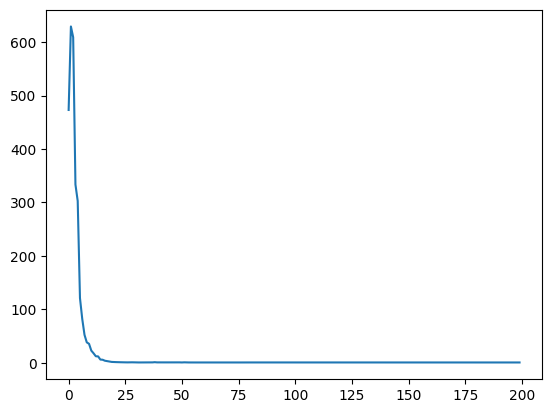

In [ ]:
# epoch가 최소 25번 / 긍께 25번은 돌아야 거의 정확해진다
plt.plot(r.history['loss'], label='loss') # 예측이 정확해짐

In [ ]:
a = model.layers[0].get_weights()[0][0,0]

# np.float32(0.33221465)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


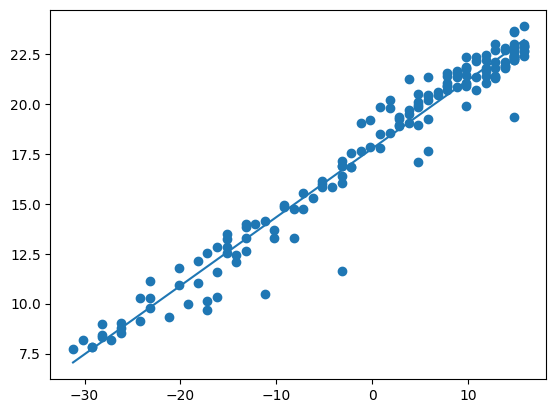

In [ ]:
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)